In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab

In [11]:
from matplotlib import __version__ as matplotlibversion
if matplotlibversion < "3.4":
    print("Matplotlib versions older than 3.4 may not be able to generate figure 2E, as they do not support alpha arrays")

In [12]:
raw_data_path = '/users/mp01950/GSE242894/raw_data/'
#cell_type = 'Transition'
first = '4cN'
second = '4n'

In [13]:
cell_metadata = pd.read_csv(raw_data_path+"coorg_mixed_org.csv", index_col=0)

In [14]:
cell_metadata

,Sample,revised_cell_type,leiden,cluster
AAACCTGAGCTAACAA-co1,0,co-NPC,4,4cN
AAACCTGAGGCAGGTT-co1,0,co-NPC,0,0cN
AAACCTGCACGTCTCT-co1,0,co-NPC,4,4cN
AAACCTGGTCTGCCAG-co1,0,co-NPC,0,0cN
AAACCTGGTGTCGCTG-co1,0,co-neuron,8,8cn
...,...,...,...,...
TTTGGTTTCCCTAACC-or3,5,neuron,1,1n
TTTGTCAAGATTACCC-or3,5,neuron,1,1n
TTTGTCAAGTAATCCC-or3,5,NPC,4,4N
TTTGTCAAGTGCGTGA-or3,5,NPC,0,0N


In [15]:
#meta_l = cell_metadata.index
#rp_l = reaction_penalties.T.index

In [16]:
#set(meta_l) - set(rp_l)

In [17]:
#set(rp_l) - set(meta_l)

In [18]:
#Combinig all cell types for co-organoid
df1 = pd.read_csv(raw_data_path+"compass_result/scrun/"+"neu_reactions.tsv", sep="\t", index_col = 0)
df2 = pd.read_csv(raw_data_path+"compass_result/scrun/"+"NPC_reactions.tsv", sep="\t", index_col = 0)
df3 = pd.read_csv(raw_data_path+"compass_result/scrun/"+"Transition_reactions.tsv", sep="\t", index_col = 0)
df4 = pd.read_csv(raw_data_path+"compass_result/scrun/"+"coneuron_reactions.tsv", sep="\t", index_col = 0)
df5 = pd.read_csv(raw_data_path+"compass_result/scrun/"+"coNPC_reactions.tsv", sep="\t", index_col = 0)
#df3 = df3.iloc[:, 148:] #subsetting only co-celltype from Transition
add = pd.read_csv(raw_data_path+"compass_result/scrun/"+"add.tsv", sep="\t", index_col = 0)
reaction_penalties = pd.merge(df1, df2, left_index=True, right_index=True)
reaction_penalties = pd.merge(reaction_penalties, df3, left_index=True, right_index=True)
reaction_penalties = pd.merge(reaction_penalties, df4, left_index=True, right_index=True)
reaction_penalties = pd.merge(reaction_penalties, df5, left_index=True, right_index=True)
reaction_penalties = pd.merge(reaction_penalties, add, left_index=True, right_index=True)
reaction_penalties = reaction_penalties.drop('TTAACTCAGGTGCTTT-co3', axis=1) 

In [19]:
#reaction_penalties = pd.read_csv(raw_data_path+"compass_result/scrun/"+cell_type+"_reactions.tsv", sep="\t", index_col = 0)

In [20]:
reaction_penalties

,AAACCTGTCGTGGGAA-or1,AAACGGGCATGGGAAC-or1,AAGGTTCCAGCATGAG-or1,AATCCAGAGAAGGGTA-or1,AATCCAGAGGAATTAC-or1,ACAGCTAGTCTTGCGG-or1,ACATCAGGTGTGCGTC-or1,ACCCACTGTGAGGGTT-or1,ACGAGCCAGTTACGGG-or1,ACGAGGACAAGTCTAC-or1,...,TTCTACATCCTAGGGC-co3,TTCTCAAAGCAGCCTC-co3,TTCTCAAAGTGGAGTC-co3,TTCTCAATCCTAAGTG-co3,TTGACTTTCCGTAGTA-co3,TTGCGTCCAGCTCCGA-co3,TTTGTCAAGCTAACTC-co3,GTCTCGTGTGTCAATC-co1,CATGACACAGACTCGC-co3,AGCTCTCAGTTAAGTG-or1
10FTHF5GLUtl_pos,4343.152932,3863.351849,4306.191835,4164.695140,4166.690011,4103.627819,4262.262029,3994.665452,3750.412998,4167.019694,...,4157.665022,3829.556833,4230.260293,4103.709594,3854.003645,4088.701708,4037.137847,3824.581236,4314.864156,3853.351189
10FTHF5GLUtm_pos,6219.054503,5527.165506,6258.685293,5746.623150,5838.827089,6205.051429,6236.445327,5636.339619,5368.990660,5789.078154,...,6203.920655,5521.588012,5717.822645,5748.400108,5499.961176,5658.789424,5769.225812,5434.866356,6238.967218,5971.844504
10FTHF6GLUtl_pos,5434.660021,4664.882107,5377.145330,5151.151178,5157.046858,5048.500067,5310.199340,4879.042790,4484.760890,5153.676341,...,5142.641650,4613.296470,5253.391032,5050.439061,4650.348048,5026.293002,4947.660566,4604.293314,5389.601886,4648.163123
10FTHF6GLUtm_pos,6629.906151,5842.644519,6688.455857,6170.694409,6293.588530,6628.301059,6665.928137,5989.134778,5654.416570,6225.085821,...,6621.334544,5829.649992,6133.189114,6166.949713,5795.940680,6058.650688,6194.424595,5755.124271,6671.564879,6266.177333
10FTHF7GLUtl_pos,6115.661618,5199.012637,6009.937777,5714.167175,5737.138655,5678.414898,5955.892915,5398.245060,4973.251741,5662.681314,...,5797.216728,5135.616724,5769.547551,5636.865631,5175.638244,5594.439175,5535.675055,5121.528783,6016.082997,5178.037745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_pre_prot(r)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdec2coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,20800.464194,19386.614333,20456.752053,20052.370987,19478.470346,19099.274324,20391.478863,19733.758780,21047.136060,19230.288690
sink_tetdec2coa(c)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdece1coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,20800.464194,19386.614333,20456.752053,20052.370987,19478.470346,19099.274324,20391.478863,19733.758780,21047.136060,19230.288690


In [21]:
cluster1 = cell_metadata.index[cell_metadata['cluster'] == '4cN']
cluster2 = cell_metadata.index[cell_metadata['cluster'] == '4n']
#cluster1 = cell_metadata.index[cell_metadata['leiden'] == 4]
#cluster2 = cell_metadata.index[cell_metadata['leiden'] == 6]

In [22]:
cluster1

Index(['AAACCTGAGCTAACAA-co1', 'AAACCTGCACGTCTCT-co1', 'AAAGATGTCTCGAGTA-co1',
       'AAAGCAAGTACCGTTA-co1', 'AACTTTCCATTTCACT-co1', 'AAGACCTTCCTAAGTG-co1',
       'AAGGCAGCACGGATAG-co1', 'AAGGCAGTCGTGGGAA-co1', 'AAGTCTGTCAGAGACG-co1',
       'ACACCGGCATGCTAGT-co1',
       ...
       'TGGGAAGAGAGACGAA-co3', 'TGTATTCAGTACGCGA-co3', 'TTAGGCAGTAGTACCT-co3',
       'TTCGAAGGTATGCTTG-co3', 'TTCTACATCCTAGGGC-co3', 'TTCTCAAAGCAGCCTC-co3',
       'TTCTCAAAGTGGAGTC-co3', 'TTCTCAATCCTAAGTG-co3', 'TTGCGTCCAGCTCCGA-co3',
       'TTTGTCAAGCTAACTC-co3'],
      dtype='object', length=423)

In [23]:
cluster2

Index(['AAAGTAGGTGATGCCC-or2', 'AGTGGGAGTAAACGCG-or2', 'CGTCTACGTGCTAGCC-or2',
       'CGTTAGAGTGCGATAG-or2', 'GATCTAGAGAAAGTGG-or2', 'AGTTGGTTCGTTACAG-or3',
       'ATGTGTGAGTGAAGAG-or3', 'CACAGTATCCTCAACC-or3', 'CGACCTTGTACCAGTT-or3',
       'CTACCCATCGAGAACG-or3', 'TAGAGCTAGCGGATCA-or3'],
      dtype='object')

In [24]:
reaction_metadata = pd.read_csv("/users/mp01950/GSE242894/reaction_metadata.csv", index_col = 0)

In [25]:
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [26]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [27]:
reaction_consistencies

,AAACCTGTCGTGGGAA-or1,AAACGGGCATGGGAAC-or1,AAGGTTCCAGCATGAG-or1,AATCCAGAGAAGGGTA-or1,AATCCAGAGGAATTAC-or1,ACAGCTAGTCTTGCGG-or1,ACATCAGGTGTGCGTC-or1,ACCCACTGTGAGGGTT-or1,ACGAGCCAGTTACGGG-or1,ACGAGGACAAGTCTAC-or1,...,TTCTACATCCTAGGGC-co3,TTCTCAAAGCAGCCTC-co3,TTCTCAAAGTGGAGTC-co3,TTCTCAATCCTAAGTG-co3,TTGACTTTCCGTAGTA-co3,TTGCGTCCAGCTCCGA-co3,TTTGTCAAGCTAACTC-co3,GTCTCGTGTGTCAATC-co1,CATGACACAGACTCGC-co3,AGCTCTCAGTTAAGTG-or1
10FTHF5GLUtl_pos,3.572898,3.689935,3.581442,3.614845,3.614367,3.629614,3.591694,3.656518,3.719596,3.614288,...,3.616534,3.698718,3.599229,3.629594,3.692357,3.633257,3.645945,3.700018,3.579431,3.692526
10FTHF5GLUtm_pos,3.213950,3.331873,3.207599,3.292942,3.277027,3.216204,3.211158,3.312316,3.360902,3.285583,...,3.216386,3.332882,3.297966,3.292633,3.336806,3.308342,3.289017,3.348710,3.210754,3.254505
10FTHF6GLUtl_pos,3.348748,3.501452,3.359385,3.402314,3.401171,3.422439,3.371911,3.456575,3.540820,3.401824,...,3.403967,3.512569,3.382664,3.422055,3.504572,3.426847,3.442612,3.514522,3.357072,3.505041
10FTHF6GLUtm_pos,3.149987,3.276374,3.141196,3.221755,3.202038,3.150229,3.144569,3.251615,3.309115,3.212981,...,3.151281,3.278600,3.227851,3.222362,3.284398,3.240076,3.217918,3.291464,3.143724,3.206403
10FTHF7GLUtl_pos,3.230712,3.393068,3.248148,3.298605,3.294594,3.304880,3.257180,3.355469,3.437454,3.307655,...,3.284178,3.405334,3.288962,3.312223,3.397573,3.319777,3.330334,3.408080,3.247126,3.397109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,2.036309,2.124199,1.959067,2.024209,2.076023,2.000237,1.996139,1.991107,2.092980,2.015140,...,2.006705,2.077094,2.023367,2.043331,2.072368,2.092026,2.026562,2.059347,1.994917,2.085190
sink_octdececoa(c)_neg,1.704282,1.810685,1.622730,1.661465,1.677689,1.659005,1.645634,1.666016,1.777806,1.644513,...,1.685881,1.726016,1.714509,1.716352,1.744880,1.748520,1.681599,1.711539,1.639005,1.714919
sink_pre_prot(r)_neg,7.497701,7.543392,7.516710,7.488919,7.548351,7.495740,7.479188,7.488487,7.620558,7.489250,...,7.517331,7.538765,7.480426,7.491921,7.573178,7.516644,7.541287,7.647354,7.496073,7.553160
sink_tetdec2coa(c)_neg,2.036309,2.124199,1.959067,2.024209,2.076023,2.000237,1.996139,1.991107,2.092980,2.015140,...,2.006705,2.077094,2.023367,2.043331,2.072368,2.092026,2.026562,2.059347,1.994917,2.085190


In [28]:
wilcox_results = wilcoxon_test(reaction_consistencies, cluster1, cluster2)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [29]:
wilcox_results

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
10FTHF5GLUtl_pos,3670.0,0.001075,0.968146,0.003207,10FTHF5GLUtl
10FTHF5GLUtm_pos,3600.0,0.001938,0.855509,0.005029,10FTHF5GLUtm
10FTHF6GLUtl_pos,3673.0,0.001048,0.978858,0.003173,10FTHF6GLUtl
10FTHF6GLUtm_pos,3633.0,0.001473,0.931049,0.004076,10FTHF6GLUtm
10FTHF7GLUtl_pos,3712.0,0.000745,0.991714,0.002551,10FTHF7GLUtl
...,...,...,...,...,...
sink_decdicoa(c)_neg,3966.0,0.000066,1.167630,0.001132,sink_decdicoa(c)
sink_octdececoa(c)_neg,3847.0,0.000215,1.065064,0.001307,sink_octdececoa(c)
sink_pre_prot(r)_neg,4106.0,0.000015,1.272867,0.000857,sink_pre_prot(r)
sink_tetdec2coa(c)_neg,3966.0,0.000066,1.167630,0.001132,sink_tetdec2coa(c)


In [30]:
W = wilcox_results.merge(reaction_metadata, how='left',
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [39]:
W

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_neg,3969.0,0.000064,1.284583,0.001132,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
2HBO_pos,3871.0,0.000170,1.194206,0.001182,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,3846.0,0.000217,1.157402,0.001315,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,3670.0,0.000987,1.056480,0.003086,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,3670.0,0.000987,1.056480,0.003086,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1467_neg,2972.0,0.106382,0.464081,0.128424,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1467_pos,3894.0,0.000136,1.221434,0.001152,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1487_pos,3659.0,0.001182,1.022822,0.003452,r1487,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
r1488_pos,3582.0,0.002245,0.909850,0.005499,r1488,EC:6.2.1.3,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,NaN,Fatty acid oxidation,6.2.1.3,0.0


In [47]:
W[W['subsystem'] == 'Cholesterol metabolism'].associated_genes.unique()

array(['ACAT3', 'TM7SF2', 'DHCR7', 'FDPS', 'MVD', 'EBP', 'HMGCS1',
       'HMGCS2', 'HMGCL; HMGCLL1', 'HMGCL', 'GM9745; IDI1', 'SC5D',
       'CYP7A1; SC5D', 'MVK', 'PMVK', 'SQLE', 'FDFT1', 'AACS', 'HMGCR',
       'CYP51', 'DHCR24'], dtype=object)

In [157]:
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-2.2, 2.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate(first, xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate(second, xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

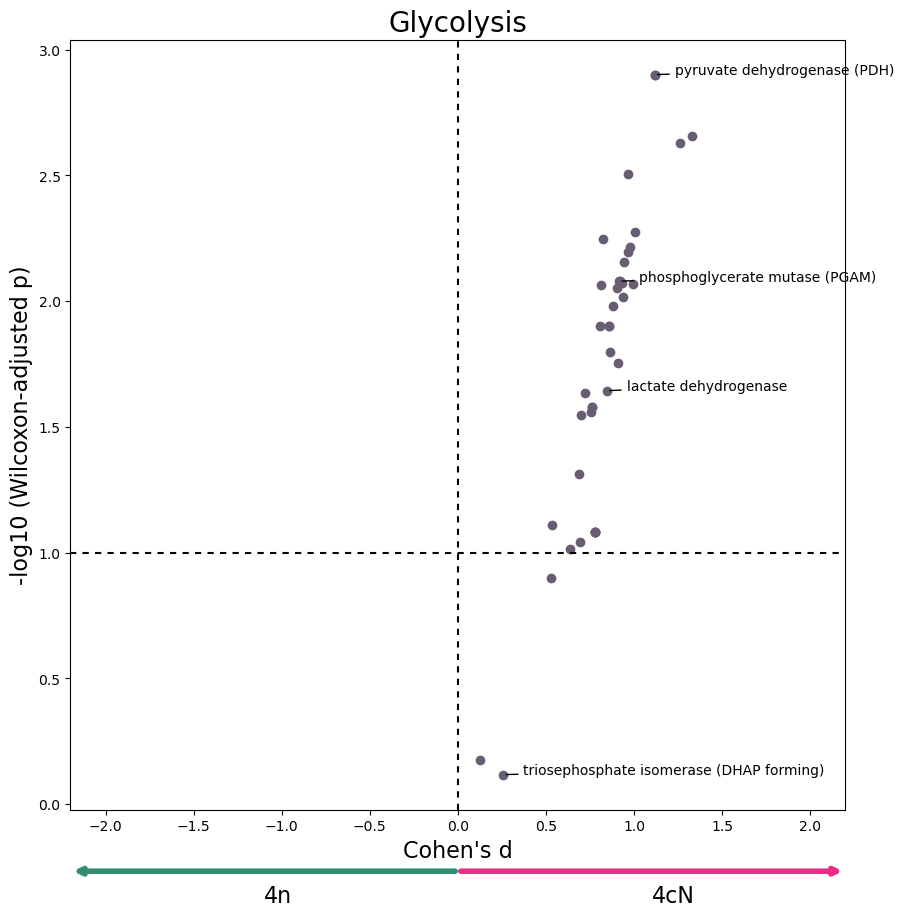

In [158]:
data = W[W['subsystem'] == "Glycolysis/gluconeogenesis"]
plot_differential_scores(data, title='Glycolysis', c="#695D73")

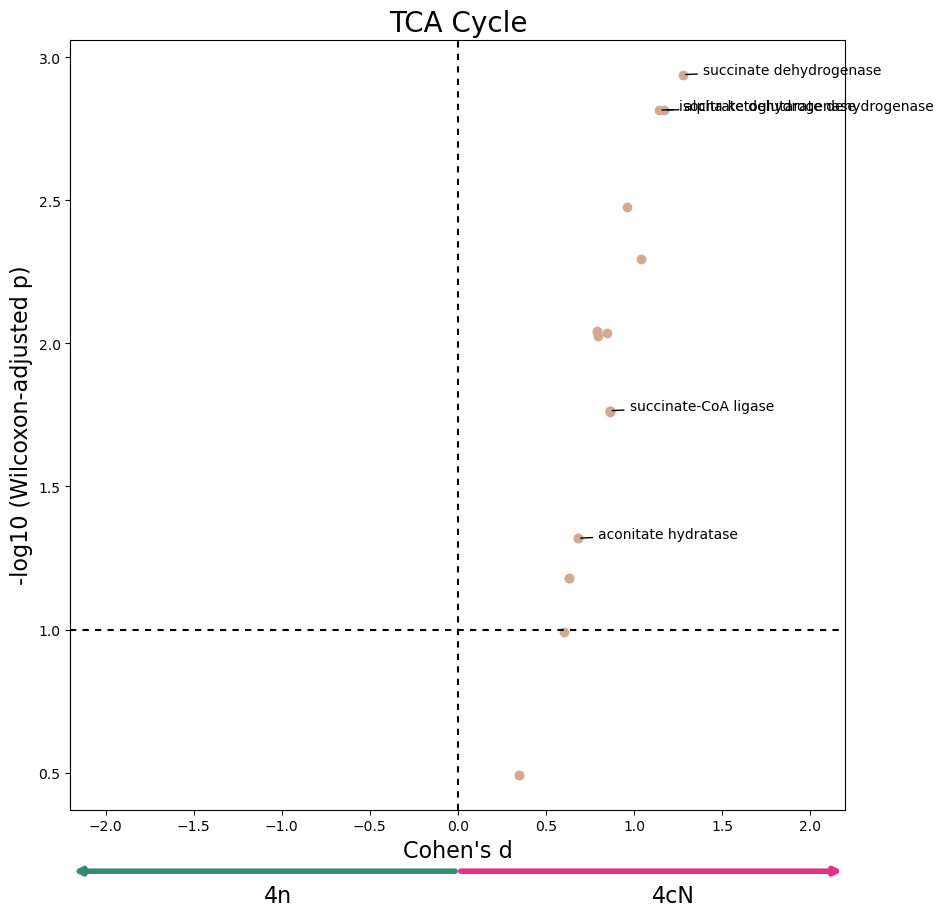

In [159]:
data = W[W['subsystem'] == "Citric acid cycle"]
plot_differential_scores(data, title="TCA Cycle", c="#D3A991")

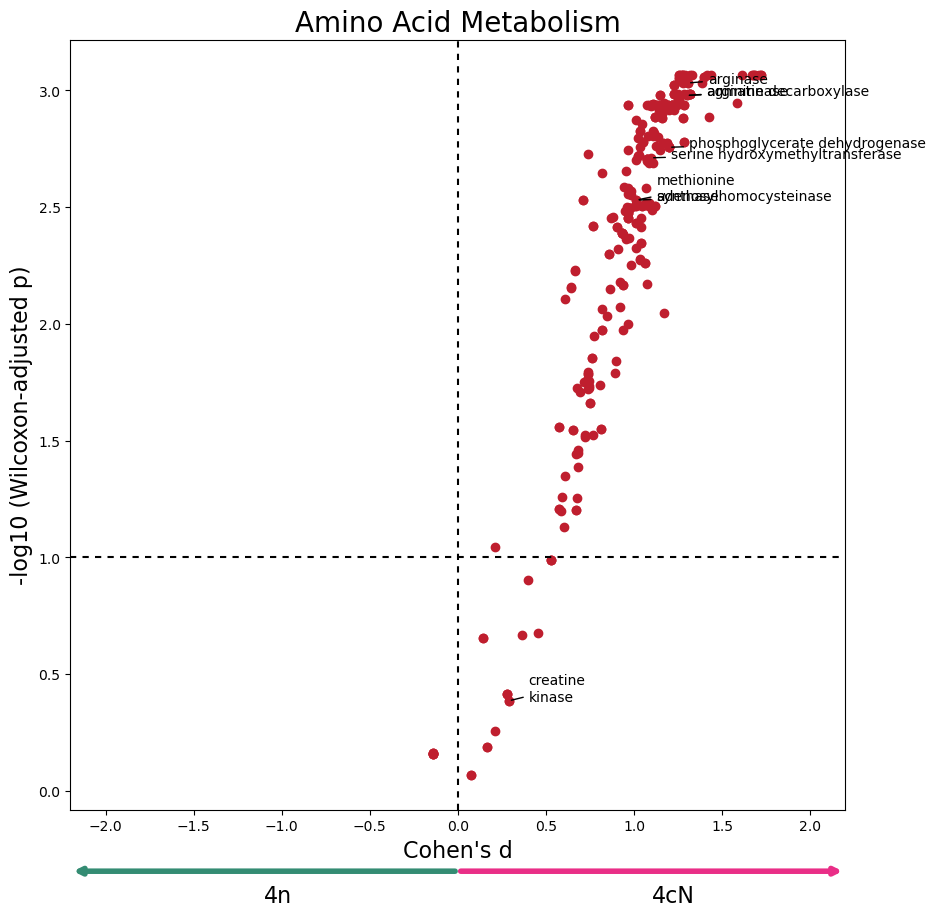

In [160]:
data = W[W['subsystem'].isin(amino_acid_metab)].copy()
data['adjusted_pval'] = data['adjusted_pval'].clip(1e-12)
plot_differential_scores(data, "Amino Acid Metabolism", c="#BF1E2E")

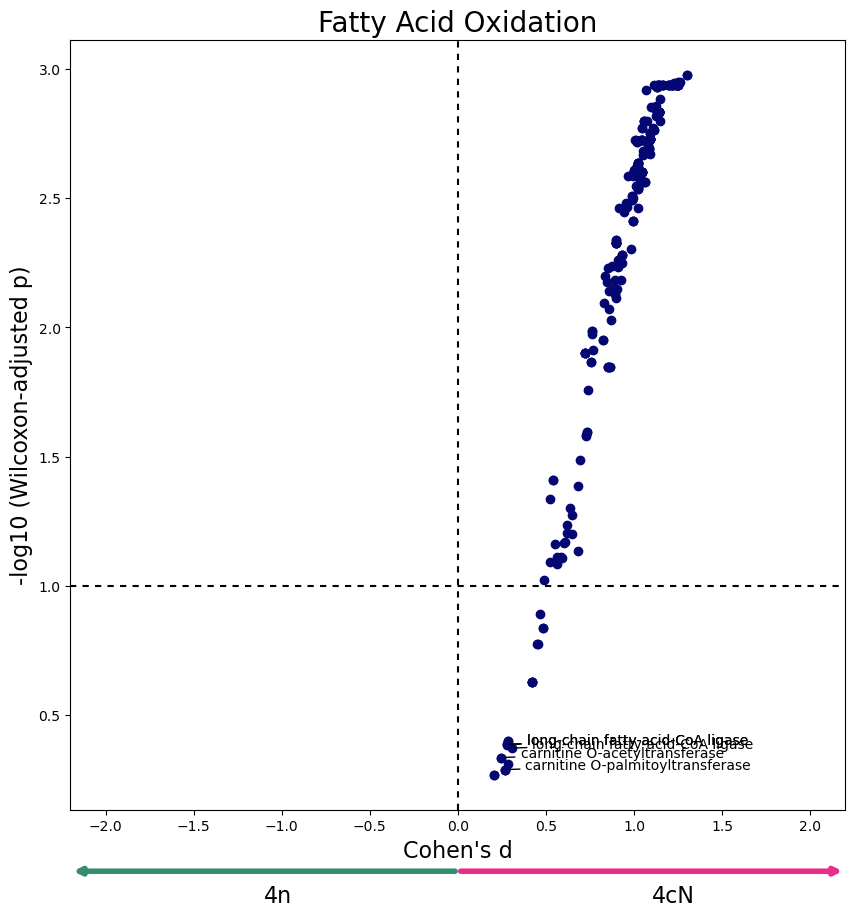

In [161]:
data = W[W['subsystem'] == "Fatty acid oxidation"]
plot_differential_scores(data, "Fatty Acid Oxidation", c="#040772")

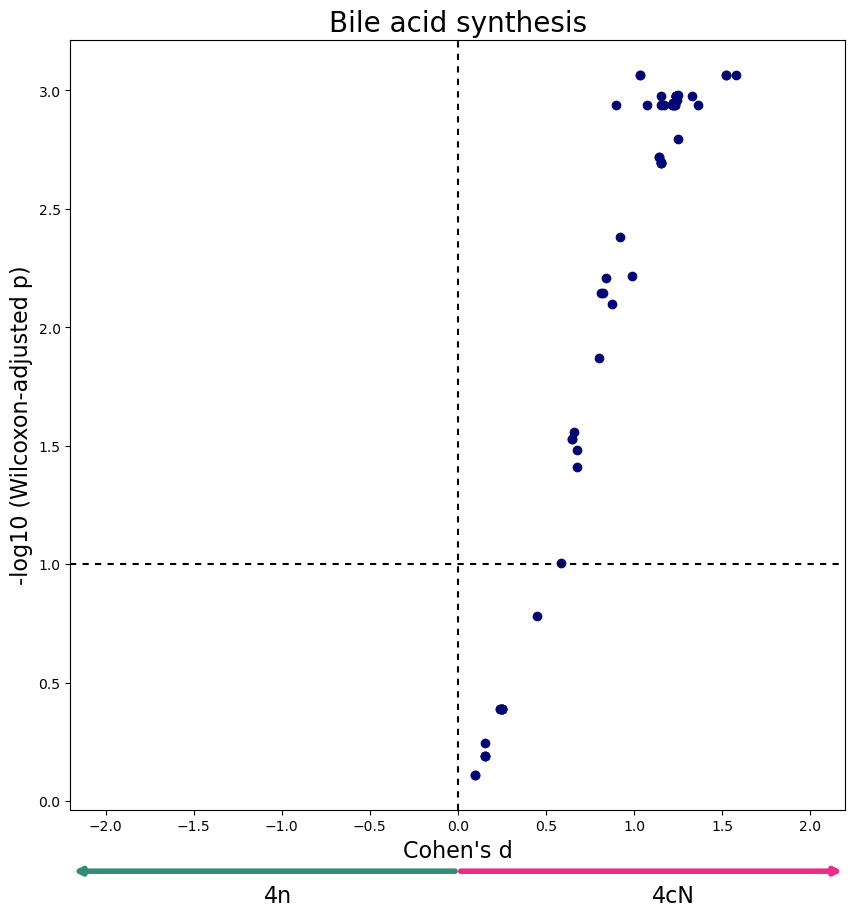

In [162]:
data = W[W['subsystem'] == "Bile acid synthesis"]
plot_differential_scores(data, "Bile acid synthesis", c="#040772")

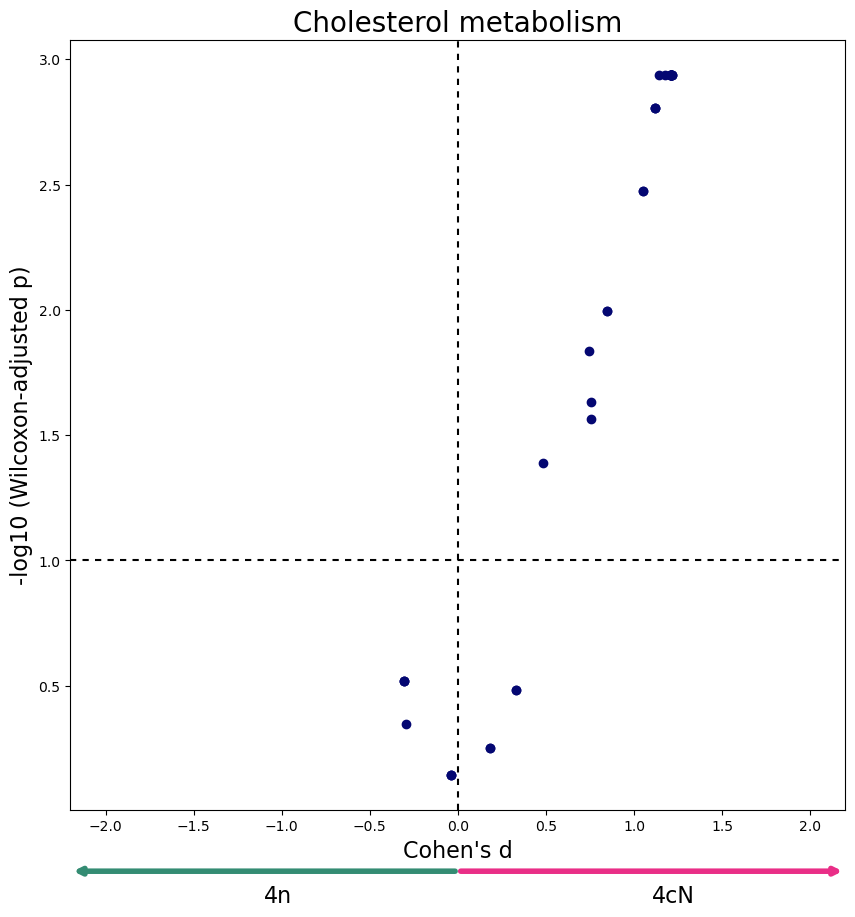

In [163]:
data = W[W['subsystem'] == "Cholesterol metabolism"]
plot_differential_scores(data, "Cholesterol metabolism", c="#040772")

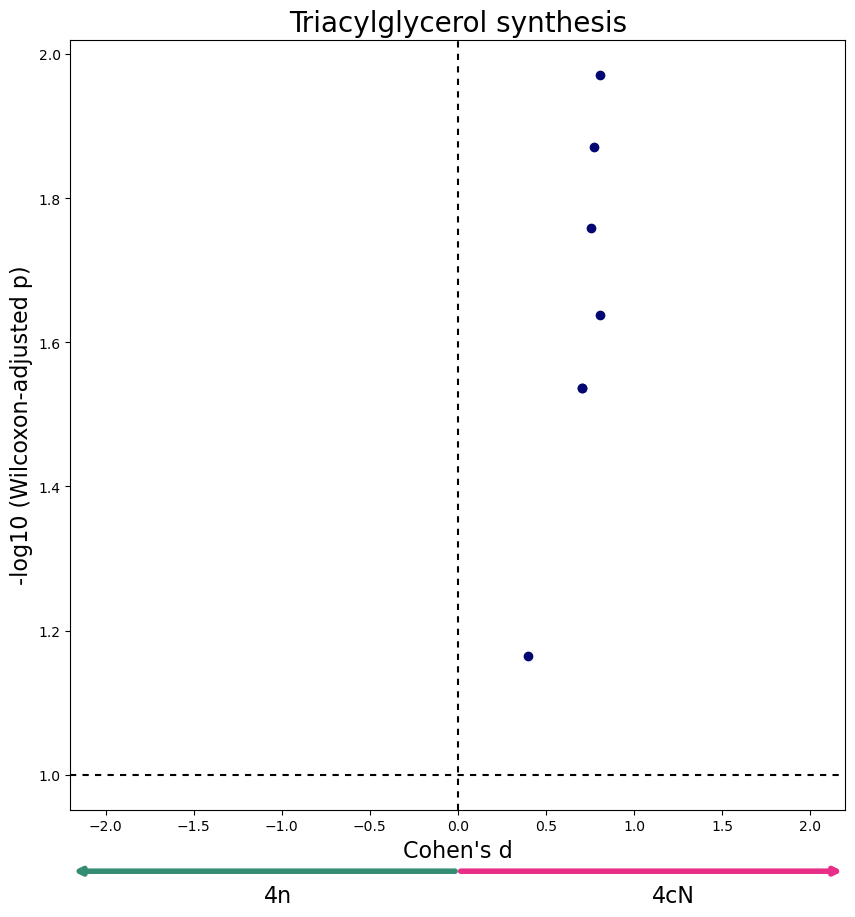

In [164]:
data = W[W['subsystem'] == "Triacylglycerol synthesis"]
plot_differential_scores(data, "Triacylglycerol synthesis", c="#040772")

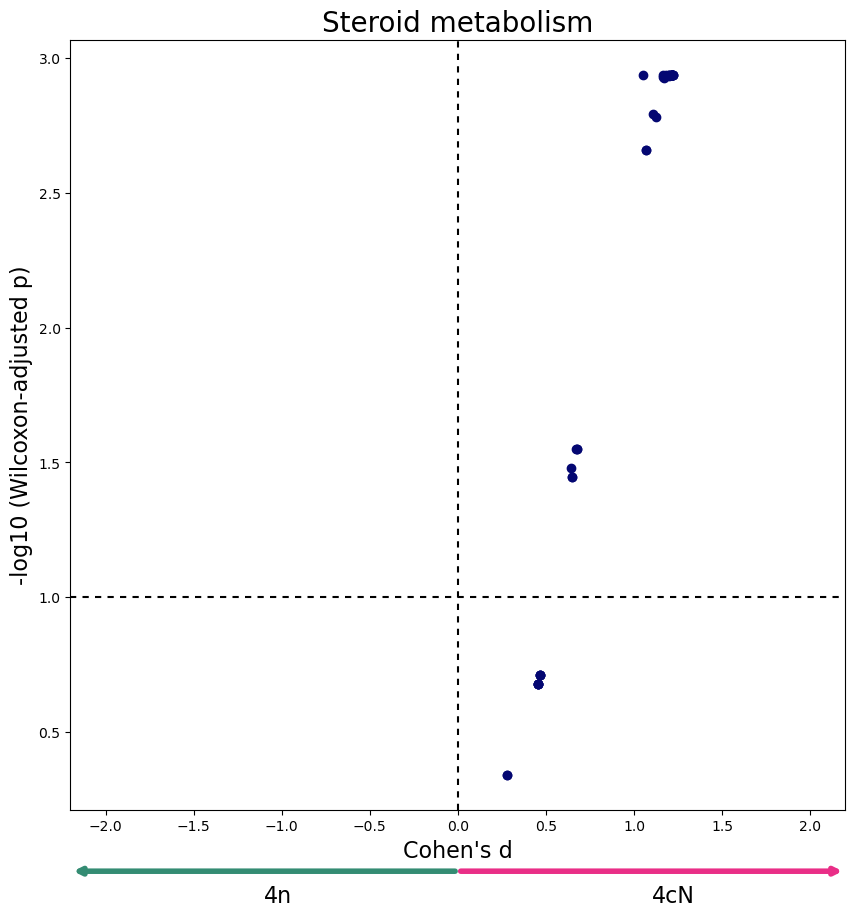

In [165]:
data = W[W['subsystem'] == "Steroid metabolism"]
plot_differential_scores(data, "Steroid metabolism", c="#040772")

In [166]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

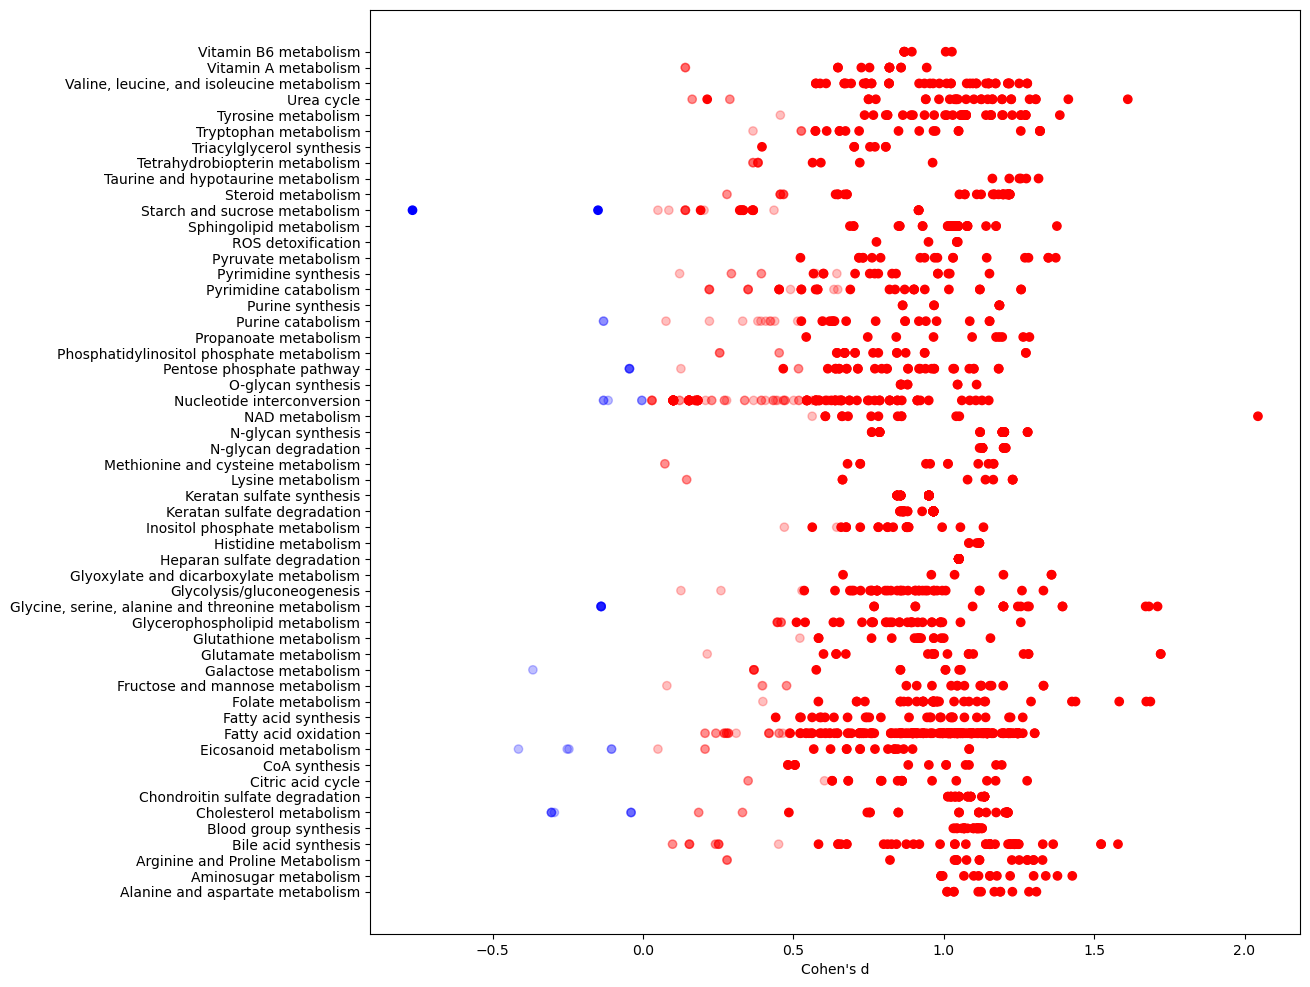

In [168]:
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
#axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
if len(d) == 0:
    print('No reaction with adjusted p-val < 0.1!')
else:
    axs.scatter(d, d.index, alpha=0)
    color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
    alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
    axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
    axs.set_xlabel("Cohen's d")

In [169]:
d

subsystem
Alanine and aspartate metabolism                     1.145848
Aminosugar metabolism                                1.134328
Arginine and Proline Metabolism                      1.118417
Bile acid synthesis                                  1.153628
Blood group synthesis                                1.098737
Cholesterol metabolism                               1.189104
Chondroitin sulfate degradation                      1.065070
Citric acid cycle                                    0.860688
CoA synthesis                                        0.950156
Eicosanoid metabolism                                0.814180
Fatty acid oxidation                                 1.036539
Fatty acid synthesis                                 0.944257
Folate metabolism                                    0.966475
Fructose and mannose metabolism                      1.121044
Galactose metabolism                                 1.005425
Glutamate metabolism                                 0.99001

In [171]:
d.to_csv('4n_vs_4cN.csv')